# Problem Statement

The goal of the project is to predict wether the individual would be able to play tennis post keeping weather in the scenario as the decision points

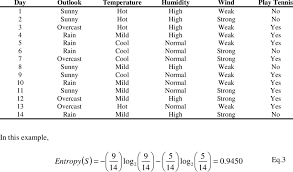

# 1st step we will create model based on Logistic Reg = IF MODEL IS PROPERLY FIT 

# 2md Step will be How Decision tree will improve the performance of the MODEL

In [3]:
# Import Libraries
import pandas as pd # pandas will process the data
import numpy as np # Numpy will take care of statistical operations
import seaborn as sns # Seaborn is for visualization
import matplotlib.pyplot as plt # For 2D charts

In [4]:
df = pd.read_csv('play_tennis.csv') # Loading the dataset
values=['outlook','temp','humidity','wind'] # Unchanged reference if required.

In [5]:
df

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


In [6]:
df=df.drop(columns='day') # Dropping the day column

In [7]:
df

,outlook,temp,humidity,wind,play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [8]:
# Checking the null values

df.isnull().sum()

outlook     0
temp        0
humidity    0
wind        0
play        0
dtype: int64

In [9]:
len(df)# Checking the length

14

In [10]:
df.shape # 14 rows and 5 columns

(14, 5)

In [11]:
df.head() # 5 values from top

,outlook,temp,humidity,wind,play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [12]:
# Statistical Description
df.describe()

,outlook,temp,humidity,wind,play
count,14,14,14,14,14
unique,3,3,2,2,2
top,Sunny,Mild,High,Weak,Yes
freq,5,6,7,8,9


In [13]:
# Machine Learning Algorith can only learn from numbers(int,float,doubles)
from sklearn import preprocessing # transforming the data

string_to_int=preprocessing.LabelEncoder() # Encoding the labels

df=df.apply(string_to_int.fit_transform) # Fit and transforming the data

In [14]:
df
# it has been converted to Binaries

,outlook,temp,humidity,wind,play
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1
5,1,0,1,0,0
6,0,0,1,0,1
7,2,2,0,1,0
8,2,0,1,1,1
9,1,2,1,1,1


In [15]:
# to divide our data into attribute set and label(Target varible)
feature_cols=['outlook','temp','humidity','wind']
x=df[feature_cols] # Entire data Independent variable
y=df.play # Target variable Dependent Variable

In [16]:
x # Entrire Data

,outlook,temp,humidity,wind
0,2,1,0,1
1,2,1,0,0
2,0,1,0,1
3,1,2,0,1
4,1,0,1,1
5,1,0,1,0
6,0,0,1,0
7,2,2,0,1
8,2,0,1,1
9,1,2,1,1


In [17]:
y.unique() # Target Column labeled ones

array([0, 1])

In [18]:
# Dividing our data into Train test split
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)# 25% of 14


In [19]:
# Performing training of the model -Calling the Model
from sklearn.linear_model import LogisticRegression

classifier=LogisticRegression()

In [20]:
classifier

LogisticRegression()

In [21]:
classifier.fit(x_train,y_train) #fitting the data in logistic regression

LogisticRegression()

In [24]:
x_train

,outlook,temp,humidity,wind
1,2,1,0,0
6,0,0,1,0
8,2,0,1,1
7,2,2,0,1
0,2,1,0,1
5,1,0,1,0
9,1,2,1,1
11,0,2,0,0
4,1,0,1,1
13,1,2,0,0


In [22]:
x_test

,outlook,temp,humidity,wind
12,0,1,1,1
10,2,2,1,0
3,1,2,0,1
2,0,1,0,1


In [25]:
#predicting the response
y_pred=classifier.predict(x_test)

In [26]:
y_pred

array([1, 0, 0, 1])

In [28]:
# Model Accuracy how often is the classified correct?
from sklearn import metrics

from sklearn.metrics import accuracy_score

print("Accuracy yeh hai ",metrics.accuracy_score(y_test,y_pred)*100)

Accuracy yeh hai  50.0


In [29]:
data_p=pd.DataFrame({'Actual':y_test,'Predicted':y_pred}) # Actual vs predicted
data_p

,Actual,Predicted
12,1,1
10,1,0
3,1,0
2,1,1


In [30]:
# importing confusion metrics and classification report
from sklearn.metrics import classification_report,confusion_matrix


print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test,y_pred))

[[0 0]
 [2 2]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.50      0.67         4

    accuracy                           0.50         4
   macro avg       0.50      0.25      0.33         4
weighted avg       1.00      0.50      0.67         4



/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#    # Conclusion- Logistic has Non-performed 

# Decision tree Model

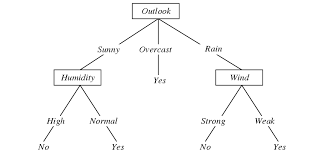

In [31]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df=pd.read_csv('play_tennis.csv') # Loading the data

In [33]:
df

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


In [34]:
# Dropping unwanted column

df=df.drop(columns='day')

In [35]:
# Display of the data
df

,outlook,temp,humidity,wind,play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [37]:
from sklearn.preprocessing import LabelEncoder # Importing Label Encoder for Labelling 

enc= LabelEncoder() 

df_num_cat= pd.DataFrame()

df_num_cat['Outlook']=enc.fit_transform(df['outlook'])
df_num_cat['Temprature']=enc.fit_transform(df['temp'])
df_num_cat['Humidity']=enc.fit_transform(df['humidity'])
df_num_cat['Wind']=enc.fit_transform(df['wind'])
df_num_cat['Play']=enc.fit_transform(df['play'])

df_num_cat

,Outlook,Temprature,Humidity,Wind,Play
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1
5,1,0,1,0,0
6,0,0,1,0,1
7,2,2,0,1,0
8,2,0,1,1,1
9,1,2,1,1,1


In [38]:
X=df_num_cat.drop(['Play'],axis=1) # Dropping the target variable becasue x is entire data to be considered

In [39]:
y=df_num_cat['Play'] # Selecting only the target column

In [40]:
X

,Outlook,Temprature,Humidity,Wind
0,2,1,0,1
1,2,1,0,0
2,0,1,0,1
3,1,2,0,1
4,1,0,1,1
5,1,0,1,0
6,0,0,1,0
7,2,2,0,1
8,2,0,1,1
9,1,2,1,1


In [41]:
y

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: Play, dtype: int64

In [42]:
from sklearn.tree import DecisionTreeClassifier # Calling the Decision tree model

dt_clf= DecisionTreeClassifier(criterion='entropy') # Calling the Entropy criteria

dt_clf.fit(X,y) # fitting the data and target variable in the model

DecisionTreeClassifier(criterion='entropy')

In [43]:
dt_clf.score(X,y)#Decisiont Tree Score

1.0

In [44]:
y_pred=dt_clf.predict(X)#Ind var
print(y)
print(y_pred) # Actual vs Predicted values

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: Play, dtype: int64
[0 0 1 1 1 0 1 0 1 1 1 1 1 0]


[Text(0.4444444444444444, 0.9, 'X[0] <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]'),
 Text(0.3333333333333333, 0.7, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.5555555555555556, 0.7, 'X[2] <= 0.5\nentropy = 1.0\nsamples = 10\nvalue = [5, 5]'),
 Text(0.3333333333333333, 0.5, 'X[0] <= 1.5\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]'),
 Text(0.2222222222222222, 0.3, 'X[3] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.1111111111111111, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3333333333333333, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4444444444444444, 0.3, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.7777777777777778, 0.5, 'X[3] <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]'),
 Text(0.6666666666666666, 0.3, 'X[1] <= 1.0\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.5555555555555556, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.7777777777777778, 0.1, 'entropy = 0.0\nsamples = 

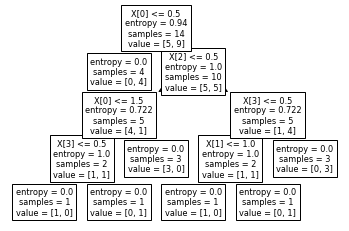

In [45]:
# Plotting the tree
from sklearn import tree 

tree.plot_tree(dt_clf)

In [46]:
import sklearn.metrics # importing the metrics

lbs=[0,1] # setting the targets lbs-label


CF= sklearn.metrics.confusion_matrix(y,y_pred,labels=lbs) #  confusion matrix

ACC= sklearn.metrics.accuracy_score(y,y_pred)

p=sklearn.metrics.precision_score(y,y_pred,labels=lbs,pos_label=0)#pos_main target pe predict which should be 1

r=sklearn.metrics.recall_score(y,y_pred,labels=lbs,pos_label=0)

f1=sklearn.metrics.f1_score(y,y_pred,labels=lbs,pos_label=0)


print("confusion matrix",CF*100,"%")

print("Accuracy",ACC *100,"%")

print("precision",p * 100,"%")

print("recall",r *100,"%")

print("f1s-score",f1 *100,"%")


confusion matrix [[500   0]
 [  0 900]] %
Accuracy 100.0 %
precision 100.0 %
recall 100.0 %
f1s-score 100.0 %


# Conclusion Decision has outperformed the Logistic Regression